# Homework 5 bitches

letz rid dat important csv. rest is bs

In [55]:
import pandas as pd

In [237]:
emails_csv = pd.read_csv('hillary-clinton-emails/Emails.csv')
emails_csv.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


we extract dem niggaz relevants fields as list of words. Other fields are bs

In [45]:
raw_corpus = ' '.join(list(emails_csv['ExtractedBodyText'].dropna()) + list(emails_csv['ExtractedSubject'].dropna()))
raw_corpus[:100]

'B6\nThursday, March 3, 2011 9:45 PM\nH: Latest How Syria is aiding Qaddafi and more... Sid\nhrc memo sy'

Then we generate the cloud without preprocessing and display it. you dummy

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [46]:
wc = WordCloud().generate(raw_corpus)

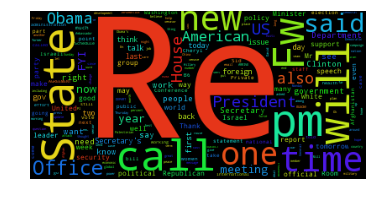

In [54]:
plt.imshow(wc)
plt.axis("off")
plt.show()

Pretty isn't it? Na iz ugly as fck we nid muthefukin preprocessing

## tokenization

In [99]:
from nltk.tokenize import TreebankWordTokenizer

In [128]:
tokenized = TreebankWordTokenizer().tokenize(raw_corpus)
tokenized[:5]

['B6', 'Thursday', ',', 'March', '3']

## lowerization

In [129]:
lowered = list(map(lambda x: x.lower(), tokenized))

## filtering

You need to dll the appropriate corpus u lazy 

In [102]:
from nltk.corpus import stopwords
from string import punctuation

In [130]:
custom_filter = ['re', 'b6', 'pm', 'fw', '...']
sw = stopwords.words('english') + list(punctuation) + custom_filter
filtered = list(filter(lambda x: x not in sw, lowered))
filtered[:5]

['thursday', 'march', '3', '2011', '9:45']

## stemming

In [123]:
from nltk.stem.snowball import SnowballStemmer

In [124]:
stemmer = SnowballStemmer(language="english")
stemmed = list(map(lambda x: stemmer.stem(x), filtered))

In [125]:
stemmed[:30]

['thursday',
 'march',
 '3',
 '2011',
 '9:45',
 'h',
 'latest',
 'syria',
 'aid',
 'qaddafi',
 'sid',
 'hrc',
 'memo',
 'syria',
 'aid',
 'libya',
 '030311.docx',
 'hrc',
 'memo',
 'syria',
 'aid',
 'libya',
 '030311.docx',
 'march',
 '3',
 '2011',
 'hillari',
 'thx',
 'h',
 'hrod17']

In [126]:
wc = WordCloud().generate(' '.join(stemmed))

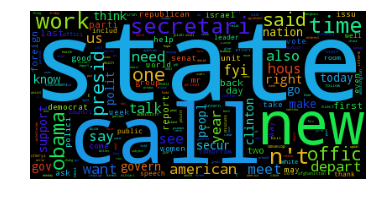

In [127]:
plt.imshow(wc)
plt.axis("off")
plt.show()

# 2

Only tokenization cause the rest not so relevant. We filter some tokens when written in their lowerized version because they are probably used as common word

In [132]:
import pycountry

In [239]:
def find_all_countries(string):
    if not string:
        return []
    tokens = TreebankWordTokenizer().tokenize(string)
    filtered_token = ['pm', 'us', 'is', 'and', 'PM'] 
    def lookup(w):
        if w in filtered_token:
            return None
        try:
           return pycountry.countries.lookup(w).alpha_3
        except LookupError:
            return None
    return list(set(filter(lambda x: x, map(lookup, tokens))))

In [240]:
emails_csv['countries'] = emails_csv['ExtractedBodyText'].dropna().apply(lambda x: find_all_countries(x))

In [241]:
emails_csv['countries'].head()

0      NaN
1    [LBY]
2       []
3      NaN
4    [LBY]
Name: countries, dtype: object

In [242]:
from nltk.sentiment import SentimentIntensityAnalyzer
vader_analyzer = SentimentIntensityAnalyzer()

def polarity(row):
    pol = vader_analyzer.polarity_scores(row.ExtractedBodyText)
    return pd.Series({'countries': row.countries, 'pos': pol['pos'], 'neg': pol['neg'] })

In [251]:
results = emails_csv.dropna()[['countries', 'ExtractedBodyText']]
results = results.apply(lambda x: polarity(x), axis=1)

In [252]:
from collections import defaultdict

In [264]:
countryPos = defaultdict(float)
countryNeg = defaultdict(float)

def agg(x):
    for c in x['countries']:
        countryPos[c] += x['pos']
        countryNeg[c] += x['neg']        
    

results[['pos', 'neg', 'countries']].dropna().apply(agg, axis=1);

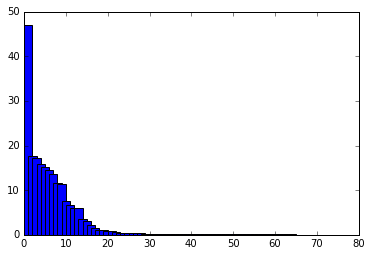

In [274]:
xy = sorted(countryPos.items(), key=lambda x: x[1], reverse=True)
x = list(map(lambda x: x[0], xy))
y = list(map(lambda x: x[1], xy))
plt.bar(range(len(x)), y, 2)
plt.show()